In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../datasets/digital_marketing_campaign_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [4]:
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [5]:
# drop un-necessary columns
data.drop(
    columns=["AdvertisingTool", "AdvertisingPlatform", "CustomerID"], inplace=True
)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

In [7]:
# checking for null values
data.isnull().sum()

Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

In [8]:
# checking for duplicates
data.duplicated().sum()

np.int64(0)

In [9]:
# plot

In [10]:
data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

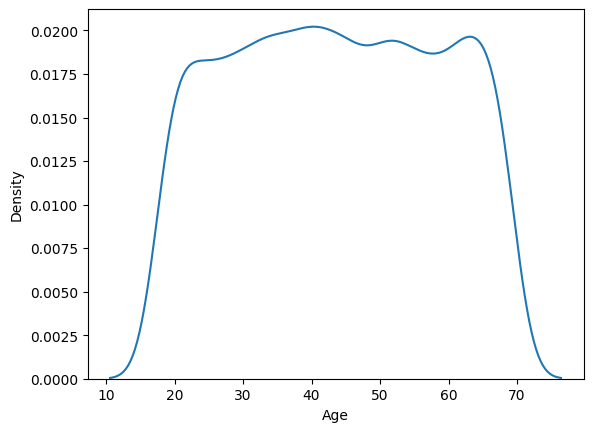

In [11]:
sns.kdeplot(data=data["Age"])
plt.show()

In [12]:
data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

In [13]:
numerical_df = data[
    [
        "Income",
        "AdSpend",
        "ClickThroughRate",
        "ConversionRate",
        "WebsiteVisits",
        "PagesPerVisit",
        "TimeOnSite",
        "SocialShares",
        "EmailOpens",
        "EmailClicks",
        "PreviousPurchases",
        "LoyaltyPoints",
    ]
]

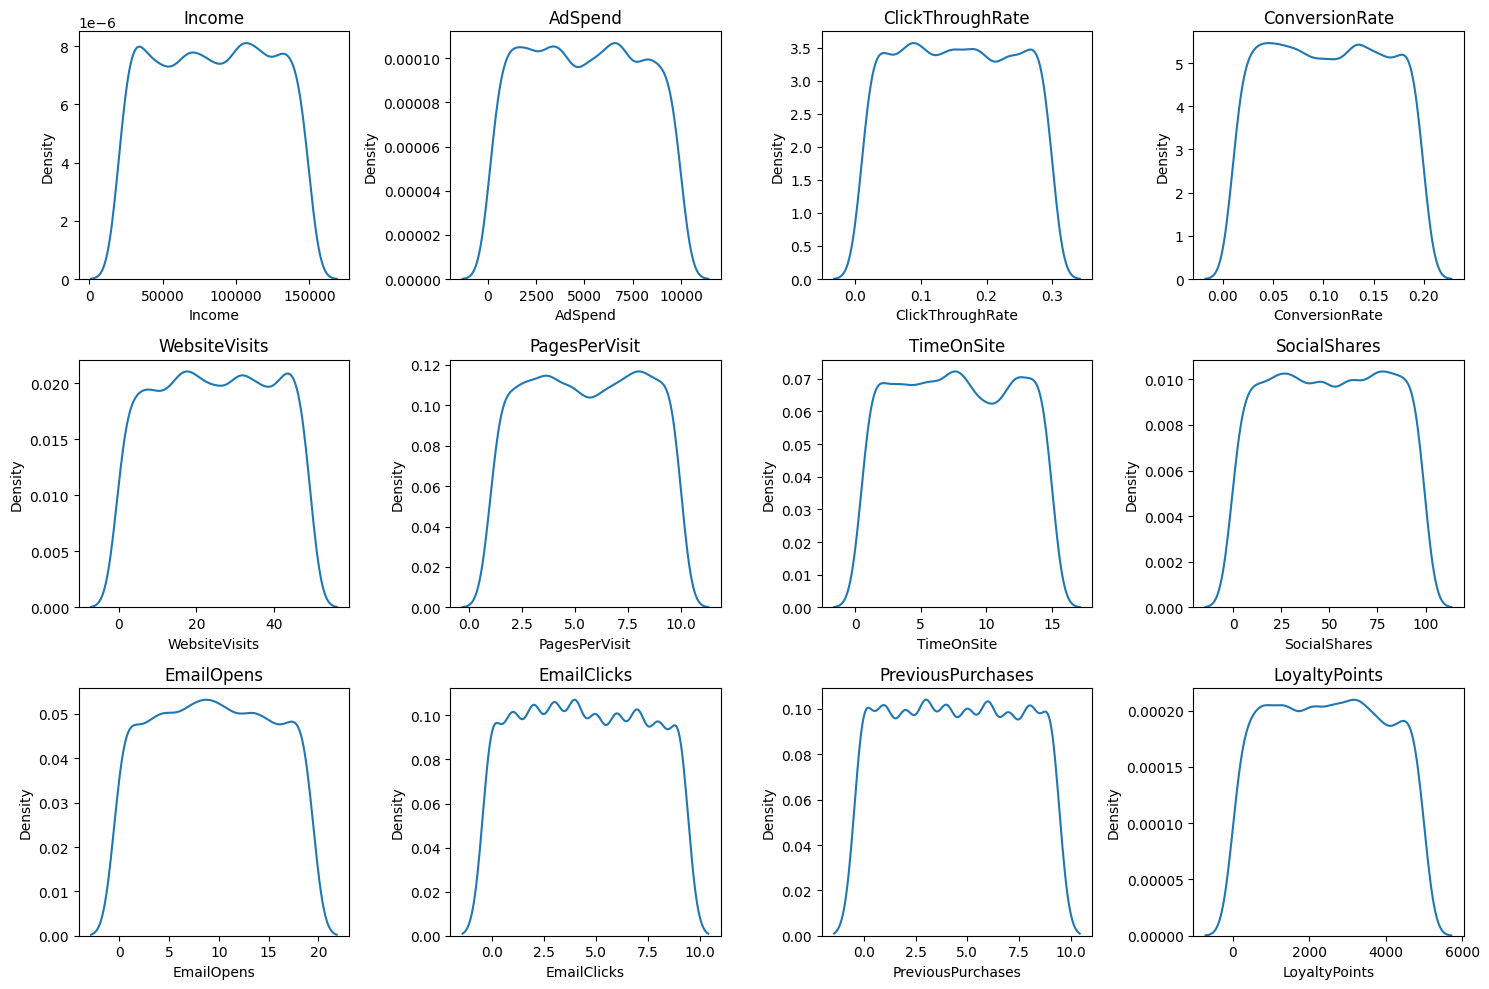

In [14]:
fid, axs = plt.subplots(3, 4, figsize=(15, 10))

axs = axs.flatten()

for i, col in enumerate(numerical_df.columns):
    sns.kdeplot(data=numerical_df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [15]:
# All the numerical columns are evenly distributed across a range of that particular column.

In [16]:
data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

In [17]:
print(data["Gender"].value_counts())
print(" ")
print(" ")
print(data["CampaignChannel"].value_counts())
print("")
print(" ")
print(data["CampaignType"].value_counts())


Gender
Female    4839
Male      3161
Name: count, dtype: int64
 
 
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

 
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64


# ANALYSIS


In [18]:
# FOR PARTICULAR  AGE GROUP WHICH CAMPAIGN-CHANNEL RESULT IN MAXIMUM PURCHASE BASED ON PAST DATA.

In [19]:
def age_category(row):
    if row["Age"] < 12:
        return "kid"
    elif 13 <= row["Age"] <= 18:
        return "Teen"
    elif 19 <= row["Age"] <= 30:
        return "Young Adult"
    elif 31 <= row["Age"] <= 50:
        return "Adult"
    else:
        return "Senior"

In [20]:
data["Age_Category"] = data.apply(age_category, axis=1)

In [21]:
data.groupby(["Age_Category", "CampaignChannel"])[
    "PreviousPurchases"
].mean().reset_index().sort_values(
    by=["Age_Category", "PreviousPurchases"], ascending=False
)

,Age_Category,CampaignChannel,PreviousPurchases
18,Young Adult,SEO,4.586510
15,Young Adult,Email,4.573727
17,Young Adult,Referral,4.402703
19,Young Adult,Social Media,4.247788
16,Young Adult,PPC,4.231198
14,Teen,Social Media,4.925926
13,Teen,SEO,4.800000
11,Teen,PPC,4.575758
10,Teen,Email,3.960000
12,Teen,Referral,3.575758


### CONCLUSIONS

- Teenagers and seniors are most effectively reached through social media campaigns. Teenagers naturally gravitate toward social media, while seniors increasingly use these platforms for connection and information and in their spare time.

- Young adults respond best to SEO-driven campaigns. This age group actively searches the internet for information and new discoveries, making SEO a crucial channel for capturing their attention and engagement.

- For adults, email campaigns are the most impactful. This demographic tends to engage more with personalized and direct communication, making email the optimal channel for marketing effort


In [22]:
# LETS SEE FOR PARTICULAR GENDER , AND PARTICULAR CAMPAIGN TYPE WHICH CAMPAIGN CHANNEL IS MOST EFFECTIVE(percentage)

In [23]:
# effectiveness- percentage
# conversion/total

In [24]:
grouped = (
    data.groupby(["Gender", "CampaignChannel", "CampaignType"])["Conversion"]
    .agg(["sum", "size"])
    .reset_index()
)

In [25]:
grouped["ConversionPercentage"] = grouped["sum"] / grouped["size"] * 100

In [26]:
grouped.sort_values(by=["CampaignType", "Gender"], ascending=False)

,Gender,CampaignChannel,CampaignType,sum,size,ConversionPercentage
23,Male,Email,Retention,119,135,88.148148
27,Male,PPC,Retention,134,154,87.012987
31,Male,Referral,Retention,146,172,84.883721
35,Male,SEO,Retention,141,161,87.577640
39,Male,Social Media,Retention,140,160,87.500000
3,Female,Email,Retention,185,225,82.222222
7,Female,PPC,Retention,202,238,84.873950
11,Female,Referral,Retention,229,264,86.742424
15,Female,SEO,Retention,196,228,85.964912
19,Female,Social Media,Retention,179,210,85.238095


### CONCLUSIONS

- For all gender and for all campaign type , all type of campaign channels are being used.

- - Male (Awareness)-Referral
- - Female(Awareness)- Referral

- - Male (Consideration)-PPC
- - Female(Consideration)- Social Media

- - Male (Conversion)-REFERRAL
- - Female(Conversion)- SEO

- - Male (Retention)-Email
- - Female(Retention)- Referral


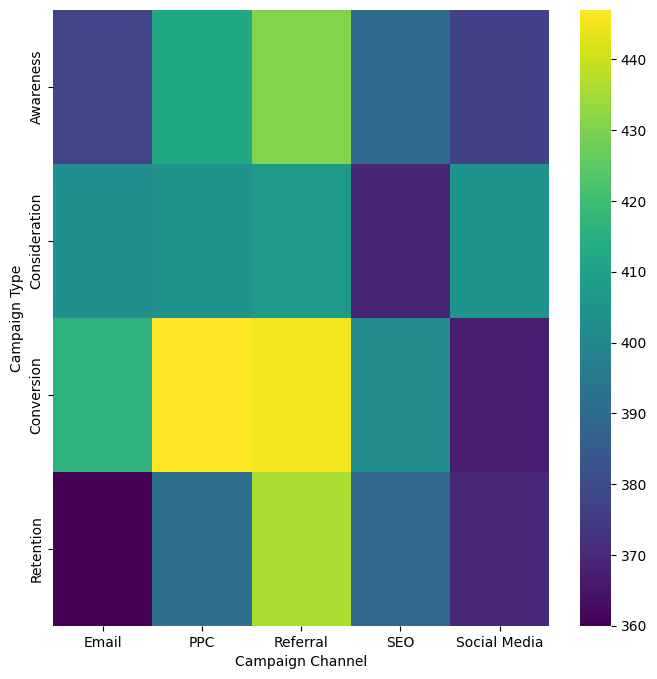

In [27]:
# IN GENERAL FOR PARTICULAR CAMPAIGN CHANNEL , WHICH CAMPIGN TYPE IS BEST

plt.subplots(figsize=(8, 8))

df_ = pd.DataFrame(
    {
        x_label: grp["CampaignType"].value_counts()
        for x_label, grp in data.groupby("CampaignChannel")
    }
)


sns.heatmap(df_, cmap="viridis")
plt.xlabel("Campaign Channel")
plt.ylabel("Campaign Type")
plt.show()

For awareness and consideration best campaign channel is refrerral, For conversion PPC is the best campaign channel followed by referral and for retention also best channel is Referral.


In [28]:
##lets check if there is relation between  adSpend and multiple outcomes of the marketing campaign.

In [29]:
response_columns = [
    "ClickThroughRate",
    "ConversionRate",
    "WebsiteVisits",
    "PagesPerVisit",
    "TimeOnSite",
    "SocialShares",
    "EmailOpens",
    "EmailClicks",
]

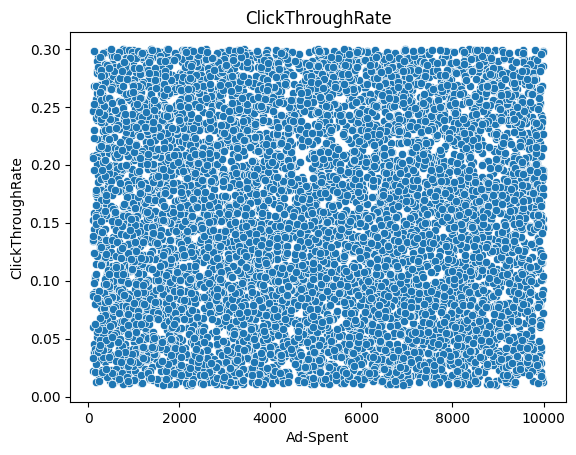

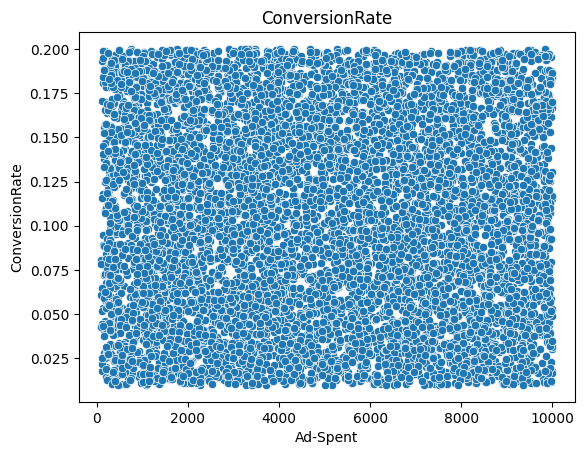

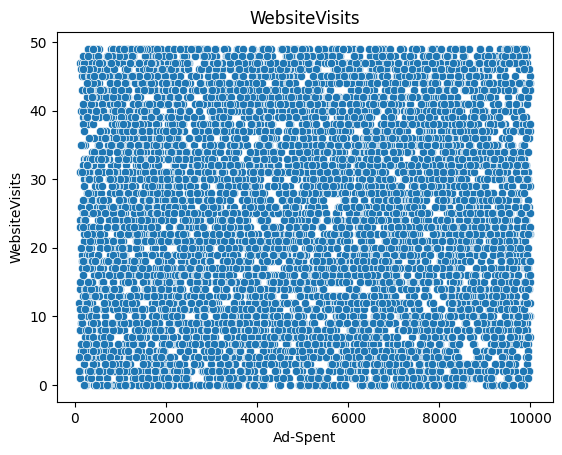

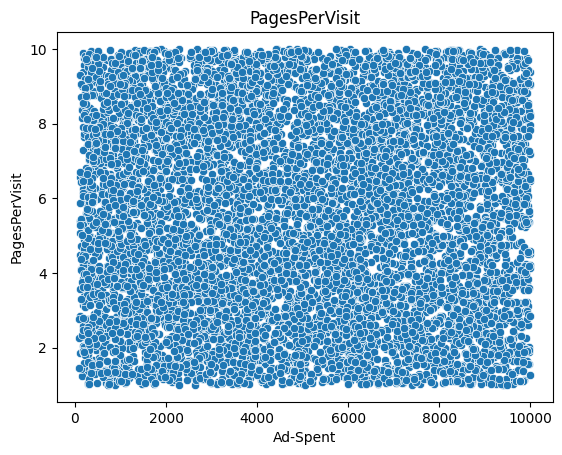

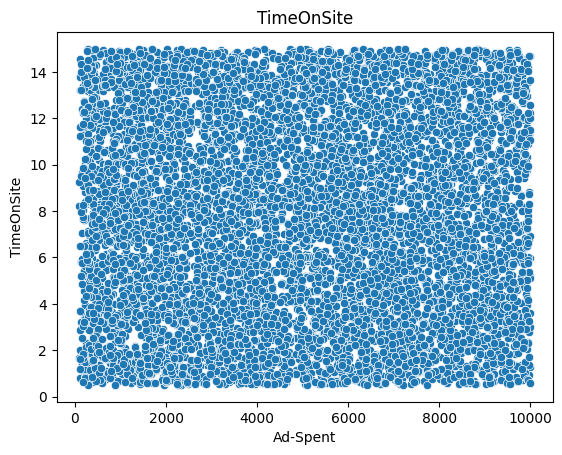

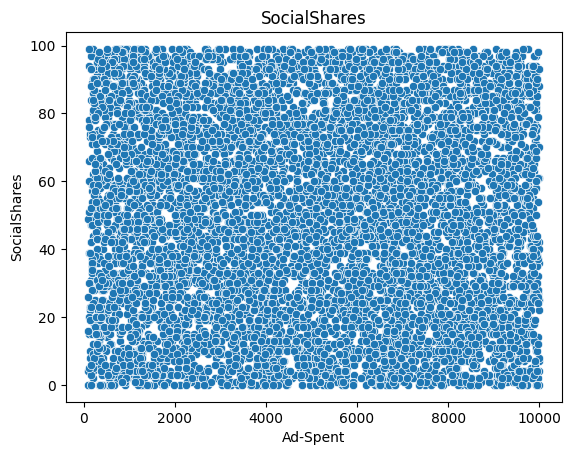

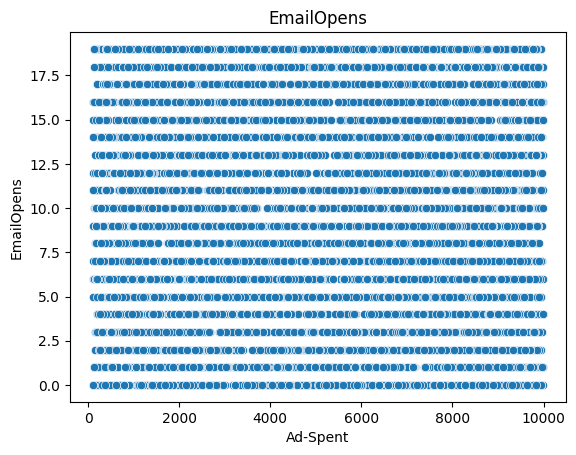

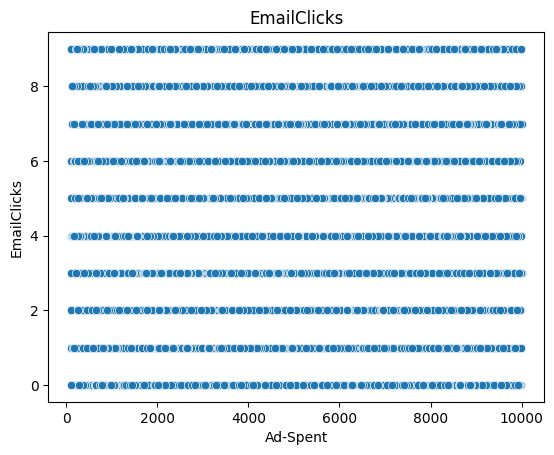

In [30]:
# ads-spend-numerical

for col in response_columns:
    sns.scatterplot(data=data, x="AdSpend", y=col)
    plt.title(col)
    plt.xlabel("Ad-Spent")
    plt.ylabel(col)
    plt.show()

In [31]:
# since our columns are not having any linear, monotonic relationship - Linear regression , spearmen cofficient(X)
# regression - linear
# spearman - monotonic

# kendall's Tau  correlation test - linear (X), monotonic(X) - to measure strength and direction between two variables.
# concordant pairs and discordant pairs.

# concordant- (x1,y1), (x2,y2) are concordant x1<x2 , y1<y2 or x1>x2 , y1>y2
# Discordant- (x1,y1), (x2,y2) are concordant x1>x2 , y1<y2 or x1<x2 , y1>y2


In [32]:
from scipy.stats import kendalltau

alpha = 0.2
for col in response_columns:
    tau, p_value = kendalltau(data["AdSpend"], data[col])

    # print results
    print(f"(H0):  THERE IS NO  ASSOCIATION BETWEEN  'SPENT ON ADDS' AND {col}")
    print(f"(H1):  THERE IS ASSOCIATION BETWEEN  'SPENT ON ADDS' AND {col}")
    print(f"Tau: {tau}")
    print(f"P-Value: {p_value}")

    # determine the result

    if p_value < alpha:
        print("reject null hypothesis")
        print(f" There is  a statisticall association  between add spent and {col}")
    else:
        print("accept null hypothesis")
        print(f" There is no  a statisticall association  between add spent and {col}")
    print("\n")

(H0):  THERE IS NO  ASSOCIATION BETWEEN  'SPENT ON ADDS' AND ClickThroughRate
(H1):  THERE IS ASSOCIATION BETWEEN  'SPENT ON ADDS' AND ClickThroughRate
Tau: -0.0057115264408051
P-Value: 0.44360841842725485
accept null hypothesis
 There is no  a statisticall association  between add spent and ClickThroughRate


(H0):  THERE IS NO  ASSOCIATION BETWEEN  'SPENT ON ADDS' AND ConversionRate
(H1):  THERE IS ASSOCIATION BETWEEN  'SPENT ON ADDS' AND ConversionRate
Tau: -0.01336667083385423
P-Value: 0.07298333944635832
reject null hypothesis
 There is  a statisticall association  between add spent and ConversionRate


(H0):  THERE IS NO  ASSOCIATION BETWEEN  'SPENT ON ADDS' AND WebsiteVisits
(H1):  THERE IS ASSOCIATION BETWEEN  'SPENT ON ADDS' AND WebsiteVisits
Tau: 0.004570310102135176
P-Value: 0.5438502388688855
accept null hypothesis
 There is no  a statisticall association  between add spent and WebsiteVisits


(H0):  THERE IS NO  ASSOCIATION BETWEEN  'SPENT ON ADDS' AND PagesPerVisit
(H1): 

In [33]:
# #LETS SEE WHICH CAMPAIGN CHANNEL IS BEST FOR  EACH PARAMETER.

In [34]:
data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion', 'Age_Category'],
      dtype='object')

In [35]:
df = data[
    [
        "CampaignChannel",
        "ClickThroughRate",
        "ConversionRate",
        "WebsiteVisits",
        "PagesPerVisit",
        "TimeOnSite",
        "SocialShares",
        "EmailOpens",
        "EmailClicks",
    ]
]

In [36]:
df = df.groupby("CampaignChannel").mean()

In [37]:
df.idxmax()

ClickThroughRate             PPC
ConversionRate      Social Media
WebsiteVisits       Social Media
PagesPerVisit       Social Media
TimeOnSite          Social Media
SocialShares        Social Media
EmailOpens              Referral
EmailClicks             Referral
dtype: object

###CONCLUSIONS

- Extensive testing reveals no significant association between 'ad spend' and key engagement metrics such as Click-Through Rate (CTR), Website Visits, Pages Per Visit, Time on Site, and Email Clicks. This indicates that merely increasing ad spend does not guarantee enhanced user engagement across these dimensions. However, increased ad spending significantly effect critical performance indicators like Conversion Rate, Social Shares, and Email Opens. This demonstrates that while general engagement metrics remain unaffected, strategic ad spending can drive substantial chages in conversion and social engagement.

- Referral campaigns excel in driving Email Opens and Email Clicks. This indicates that leveraging personal recommendations within email marketing significantly enhances engagement, as recipients are more likely to open and interact with emails endorsed by people they know.

- Pay-Per-Click (PPC) campaigns are particularly effective for Click-Through Rates (CTR). This suggests that targeted ad placements that incentivize immediate user action can effectively drive higher click-through rates compared to other campaign types.

- Social Media campaigns lead in driving Conversion Rates, Website Visits, Pages Per Visit, Time on Site, and Social Shares. This underscores the platform's role in engaging users actively, encouraging extended site visits, and fostering sharing behaviors that amplify campaign impact.


In [38]:
# DOES HIGH WEBSITE-VISIT ,  TIME- ON -SITE LEADS TO MORE CONVERSION RATE.

<Axes: xlabel='ConversionRate', ylabel='WebsiteVisits'>

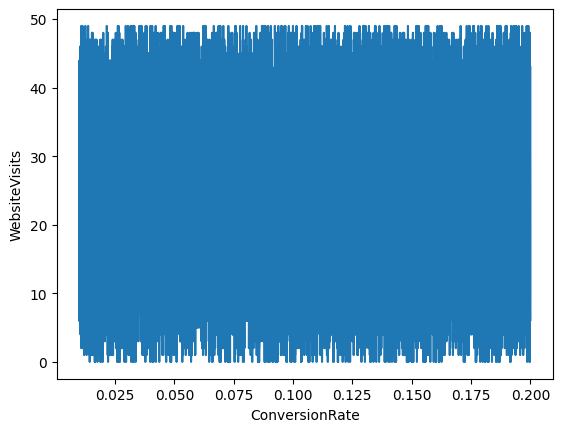

In [39]:
sns.lineplot(x="ConversionRate", y="WebsiteVisits", data=data)

In [40]:
df = data[["ConversionRate", "WebsiteVisits", "TimeOnSite"]]

In [41]:
# null - no significant effect of  webiste visit on  conversion rate.
# alternate- An increase in website  visits leads  to a higher  conversion rate.

import statsmodels.api as sm

# Add constant for intercept
X = sm.add_constant(df["WebsiteVisits"])
y = df["ConversionRate"]

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Extract the coefficient and standard error for WebsiteVisits
beta_website_visits = results.params["WebsiteVisits"]
se_website_visits = results.bse["WebsiteVisits"]

# Calculate the t-statistic
t_statistic = beta_website_visits / se_website_visits

# Get the p-value for the coefficient
p_value = results.pvalues["WebsiteVisits"]

# Output the results
print(f"\nCoefficient for WebsiteVisits: {beta_website_visits}")
print(f"Standard Error for WebsiteVisits: {se_website_visits}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the p-value
if p_value < 0.3:
    interpretation = "Reject the null hypothesis: An increase in website visits leads to a higher conversion rate."
else:
    interpretation = "Fail to reject the null hypothesis: No significant effect of website visits on conversion rate."

print(f"\nInterpretation: {interpretation}")



Coefficient for WebsiteVisits: -4.632148708256057e-05
Standard Error for WebsiteVisits: 4.2871609757702877e-05
T-statistic: -1.0804699740540498
P-value: 0.2799655295951778

Interpretation: Reject the null hypothesis: An increase in website visits leads to a higher conversion rate.


In [42]:
# null - no significant effect of  timeon site on  conversion rate.
# alternate- An increase in website  timeonsite  to a higher  conversion rate.

import statsmodels.api as sm

# Add constant for intercept
X = sm.add_constant(df["TimeOnSite"])
y = df["ConversionRate"]

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Extract the coefficient and standard error for WebsiteVisits
beta_website_visits = results.params["TimeOnSite"]
se_website_visits = results.bse["TimeOnSite"]

# Calculate the t-statistic
t_statistic = beta_website_visits / se_website_visits

# Get the p-value for the coefficient
p_value = results.pvalues["TimeOnSite"]

# Output the results
print(f"\nCoefficient for TimeOnSite: {beta_website_visits}")
print(f"Standard Error for TimeOnSite: {se_website_visits}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the p-value
if p_value < 0.3:
    interpretation = "Reject the null hypothesis: An increase in time spent leads to a higher conversion rate."
else:
    interpretation = "Fail to reject the null hypothesis: No significant effect of time spent on conversion rate."

print(f"\nInterpretation: {interpretation}")



Coefficient for TimeOnSite: 0.00011264690856936045
Standard Error for TimeOnSite: 0.0001451229901893657
T-statistic: 0.7762168380238831
P-value: 0.4376439187106915

Interpretation: Fail to reject the null hypothesis: No significant effect of time spent on conversion rate.


In [43]:
x = df[["TimeOnSite", "WebsiteVisits"]]
y = df[["ConversionRate"]]

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


# pvalue > aplha

                            OLS Regression Results                            
Dep. Variable:         ConversionRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8666
Date:                Mon, 22 Sep 2025   Prob (F-statistic):              0.420
Time:                        17:28:17   Log-Likelihood:                 11871.
No. Observations:                8000   AIC:                        -2.374e+04
Df Residuals:                    7997   BIC:                        -2.371e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1047      0.002     62.389

In [44]:
# lets see for each outcome of marketing  which campaign channel is best as per gender.

In [45]:
data.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion', 'Age_Category'],
      dtype='object')

In [46]:
metrics = [
    "ClickThroughRate",
    "ConversionRate",
    "WebsiteVisits",
    "PagesPerVisit",
    "TimeOnSite",
]


results = {}

for metric in metrics:
    metric_result = data.groupby(["Gender", "CampaignChannel"])[metric].mean()
    best_channels = metric_result.groupby("Gender").idxmax()
    results[metric] = best_channels


# print the results
for metric, best_channels in results.items():
    print(f"Best Campaign Channel for {metric} by gender")
    print(best_channels)
    print()

Best Campaign Channel for ClickThroughRate by gender
Gender
Female           (Female, PPC)
Male      (Male, Social Media)
Name: ClickThroughRate, dtype: object

Best Campaign Channel for ConversionRate by gender
Gender
Female    (Female, Social Media)
Male        (Male, Social Media)
Name: ConversionRate, dtype: object

Best Campaign Channel for WebsiteVisits by gender
Gender
Female         (Female, Email)
Male      (Male, Social Media)
Name: WebsiteVisits, dtype: object

Best Campaign Channel for PagesPerVisit by gender
Gender
Female           (Female, PPC)
Male      (Male, Social Media)
Name: PagesPerVisit, dtype: object

Best Campaign Channel for TimeOnSite by gender
Gender
Female    (Female, Social Media)
Male                 (Male, PPC)
Name: TimeOnSite, dtype: object



### CONCLUSIONS

- On researching to find is there any relationship between increase in website visit and higher conversion rate it was found statistically that an increase in website visits leads to a higher conversion rate, however there is No significant effect of Time Spent on Website and on conversion rate.

- while trying to figure out the combined effect of website visit and time spent on website we found that The F-statistic of 0.8666 is relatively low.
  The associated p-value of 0.420 is higher than the commonly accepted significance level of 0.3,
  This combination indicates that the model, using TimeOnSite and WebsiteVisits to predict ConversionRate.
  does not provide strong evidence that these variables together reliably predict how often visitors convert on the website.

- Best campaign channel for each markting output gender wise
- For ClickThroughRate:
- - Female: PPC campaign performs best.
- - Male: Social Media campaign performs best.

- For ConversionRate:
- - Female: Social Media campaign performs best.
- - Male: Social Media campaign performs best.

- For WebsiteVisits:
- - Female: Email campaign attracts more visits.
- - Male: Social Media campaign attracts more visits.

- For PagesPerVisit:
- - Female: PPC campaign results in more pages per visit.
- - Male: Social Media campaign results in more pages per visit.

For TimeOnSite:

- - Female: Social Media campaign leads to longer time on site.
- - Male: PPC campaign leads to longer time on site.
